In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Introduction

Time series modeling is a set of tools and techniques that model temporal or time series data and aim to predict or forecast future behavior of the
data. It has applications in various fields such as finance, economics, weather forecasting, and more.

By analyzing historical data, we can identify different components in time series data such as trends, seasonality, and so on, and use these insights
to make more informed business decisions.

In this demonstration, we will explore a few different techniques for time series modeling. As we construct and evaluate our models, we'll gain 
insight into how different techniques can be used to handle common challenges in time series modeling.


## Problem Statement
In  this demonstration, we will apply time series modeling techniques to a real-world problem that involves a company and its sales. The company 
has historical sales data that it has captured over a period of time and wishes to forecast future sales trends so that it may optimize its inventory
management processes.

The problem statement for this demonstration can be summarized as follows:
> Given historical sales data of a company, forecast its future sales.

By studying the forecast, the company can effectively plan and prepare their inventory to ensure that the right amount of stock is made ready over
future months.

## Data Description
You have been provided with a data set containing daily sales and profit data of the company for the period 2011 to 2014. The data set has the 
following three attributes:

table>
  <tr>
    <th> Attributes </th>
    <th> Description <th>
  </tr>
  <tr>
    <td> Order-Date </td>
    <td> The date on which the order was placed (in dd-mm-yyyy format) </td>
  </tr>
  <tr>
    <td> Sales </td>
    <td> Total sales value of the transaction (in dollars) </td>
  </tr>
  <tr>
    <td> Profit </td>
    <td> Profit made on the transaction (in dollars) </td>
  </tr>

</table>

## Outline
In this demonstration, we will:
- Prepare the data for time series modeling
- Forecast sales using the following models:
  - Autoregressive (AR)
  - Autoregressive integrated moving average (ARIMA)
  - Seasonal autoregressive integrated moving average (SARIMA)

We will analyze the performance of these models using root mean squared error (RMSE) and mean absolute percentage error (MAPE).

Please note that while we could evaluate the performance of the forecasting models using any one of RMSE or MAPE, 
to obtain a more comprehensive assessment of their performance, we will use both measures for each model.

SyntaxError: unterminated string literal (detected at line 9) (2578619736.py, line 9)

In [7]:
df = pd.read_csv('Superstore_Data.csv')

In [9]:
df

,Order Date,Sales,Profit
0,17-10-2013,5175.1710,919.9710
1,07-11-2011,1822.0800,564.8400
2,14-04-2012,5244.8400,996.4800
3,06-06-2013,3701.5200,1036.0800
4,25-02-2012,1878.7200,582.3600
...,...,...,...
5694,14-01-2013,38.9709,-32.3991
5695,12-11-2014,6.9000,-0.8400
5696,03-11-2011,17.2800,-13.9200
5697,26-07-2013,30.6180,1.0080


In [26]:
# Part 1 - Setup and Data Preparation
In this section, we will:
- Import necessary packages for executing the code
- Load the data
- Prepare the data for further analysis

SyntaxError: invalid syntax (947912752.py, line 2)

In [11]:
# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [30]:
# Let's begin by loading the data and building familiarity with it.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  5699 non-null   object 
 1   Sales       5699 non-null   float64
 2   Profit      5699 non-null   float64
dtypes: float64(2), object(1)
memory usage: 133.7+ KB


In [34]:
As you can see, the data type of the *Order Date* column is *object*. But to further conduct analyses on the data, such as grouping by month or year,
we have to convert the data type of the
*Order Date* column to *datetime*.

SyntaxError: invalid syntax (2297445134.py, line 1)

In [15]:
df.head()

,Order Date,Sales,Profit
0,17-10-2013,5175.171,919.971
1,07-11-2011,1822.080,564.840
2,14-04-2012,5244.840,996.480
3,06-06-2013,3701.520,1036.080
4,25-02-2012,1878.720,582.360


In [17]:
df.dtypes

Order Date     object
Sales         float64
Profit        float64
dtype: object

In [19]:
#Let's object type into date time.
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [21]:
df.dtypes

Order Date    datetime64[ns]
Sales                float64
Profit               float64
dtype: object

In [44]:
#Let's make sure that the data points in the data frame are ordered by date.

In [23]:
df.sort_values(by = 'Order Date', inplace = True)

In [25]:
df

,Order Date,Sales,Profit
5073,2011-01-01,55.2420,15.3420
3056,2011-01-01,120.3660,36.0360
4083,2011-01-01,113.6700,37.7700
424,2011-01-03,912.4560,-319.4640
5517,2011-01-03,6.0060,0.5460
...,...,...,...
4875,2014-12-30,8.5407,2.3607
1455,2014-12-30,255.2850,-47.6550
4345,2014-12-30,10.8540,-6.6960
1804,2014-12-31,300.2400,84.0600


In [50]:
# Next, we will set the updated *Order Date* feature as the index of the data frame.

In [27]:
df.set_index('Order Date')

,Sales,Profit
Order Date,,
2011-01-01,55.2420,15.3420
2011-01-01,120.3660,36.0360
2011-01-01,113.6700,37.7700
2011-01-03,912.4560,-319.4640
2011-01-03,6.0060,0.5460
...,...,...
2014-12-30,8.5407,2.3607
2014-12-30,255.2850,-47.6550
2014-12-30,10.8540,-6.6960


In [29]:
df['2012-10-11' : '2013-01-30'].sum()

TypeError: cannot do slice indexing on Index with these indexers [2012-10-11] of type str

In [33]:
 
# Convert index to datetime if it's not already
df.index = pd.to_datetime(df.index)

 

In [35]:
df['2012-10-11' : '2013-01-30'].sum()

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

In [37]:
#**Note:** When we change the index of the data, then to select the rows using new index we should this method   
df.loc['New_index']



KeyError: 'New_index'

In [ ]:
To study monthly sales, we need to group the rows of *df* by month and sum up the values in each group. We will use the *Grouper* function in 
conjunction with the *groupby* operation for grouping. *Grouper* is a function in the *pandas* library that allow us to group time series data
based on a specific frequency (*freq*) which in our case is monthly (*M*).

In [ ]:
df.shape

In [ ]:
DF = df.groupby(pd.Grouper(freq = 'M')).sum()

In [60]:
df.drop(columns = 'Profit', inplace = True)

In [62]:
df

,Order Date,Sales
5073,2011-01-01,55.2420
3056,2011-01-01,120.3660
4083,2011-01-01,113.6700
424,2011-01-03,912.4560
5517,2011-01-03,6.0060
...,...,...
4875,2014-12-30,8.5407
1455,2014-12-30,255.2850
4345,2014-12-30,10.8540
1804,2014-12-31,300.2400


<Axes: >

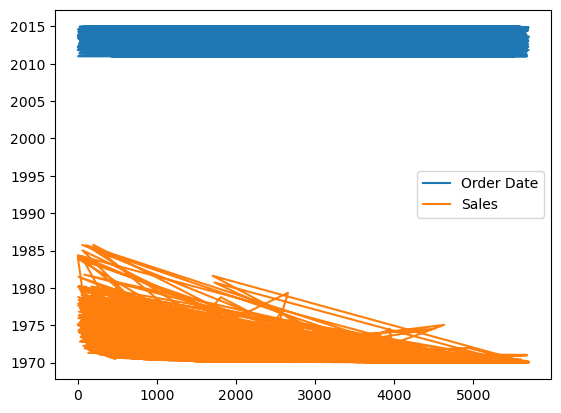

In [64]:
df.plot()

In [67]:
                     # Part 2 - Stationarity Analysis

In this part of the demonstration, we will perform tests on the time series data to understand whether it is stationary or not. The autoregressive modeling requires the time series data to be stationary. To test this, we will use the following test:
- Augmented Dickey–Fuller (ADF) test

SyntaxError: invalid character '–' (U+2013) (1185352123.py, line 4)

In [69]:
# Most of time in real data will be non stationary---need to covert into stationary--becoz it have constant mean and variance.

In [71]:
                    # ADF test---Augmented Dicky Fuller test... to chech data is stationary or non stationary.

In [73]:
from statsmodels.tsa.stattools import adfuller

In [75]:
#Note---That the null hypothesis for the ADF test is The time series is not stationary.

In [77]:
result = adfuller(df['Sales'])

In [79]:
result[1]  # P_value of the adfuller test.
        # if the P_value < 0.05--then we can reject.

0.0

In [81]:
df.head()

,Order Date,Sales
5073,2011-01-01,55.242
3056,2011-01-01,120.366
4083,2011-01-01,113.670
424,2011-01-03,912.456
5517,2011-01-03,6.006


In [83]:
# We can not use x-train and split function here because two column required.
df.shape

(5699, 2)

In [85]:
df_train = df[0:42]
df_test = df[42:] #picked random data for training and teting 80:20 ratios

In [87]:
#Plot the time series data with the train-test split
plt.figure(figsize = (14,6))
sns.lineplot(df = df_train, x = 'Order Date', y = 'Sales', marker = 'o', color = 'blue' ,label = 'Train')
sns.lineplot( df = df_test, x = 'Order Date' , y =  'Order Date',marker = 'o', color = 'Green', label = 'Test')
plt.title('Sales df')

ValueError: Could not interpret value `Order Date` for `x`. Value is a string, but `data` was not passed.

<Figure size 1400x600 with 0 Axes>

In [ ]:
###Part 3
Time Series tranformation
how to make the non stationary to stationary-
Training--> Tranforming---> AR,ARIMA,SARIMA---> Predictions

In [90]:
#Import the 'boxcox' method from 'scipy' to implement the box-cox transformation
from scipy.stats import boxcox
#Note that from here on out,we will only perform data transformations on the training data to 

In [92]:
# we transformed the sales column with BCT and store the transformed version 
boxcox(df_train['Sales'],lmbda = 0)

array([4.01172353, 4.7905371 , 4.73329951, 6.81613987, 1.79275897,
       5.07169276, 4.90614995, 5.35271322, 4.23844491, 5.82197876,
       4.23219163, 3.30908209, 3.88732039, 3.70710731, 3.4190373 ,
       3.91598315, 3.31258472, 5.61203992, 6.09899521, 5.95976101,
       3.81095327, 2.26294989, 5.17434471, 4.81828764, 2.52552062,
       3.41628302, 3.25501487, 7.963841  , 3.53485377, 5.08459183,
       5.23417077, 5.81021332, 4.95279429, 6.31783883, 1.59031625,
       3.93919839, 5.01044328, 3.61501761, 4.93269537, 1.8434027 ,
       4.08973395, 2.47462902])

In [97]:
# we tranfor,ed the sales column with BCT and store the transformed version in the df_boxcox variable.
df_boxcox = pd.Series(boxcox(df_train['Sales'],lmbda = 0 ),index = df_train.index) #np.log(df_train['Sales'])

ValueError: Could not interpret value `Order Date` for `x`. Value is a string, but `data` was not passed.

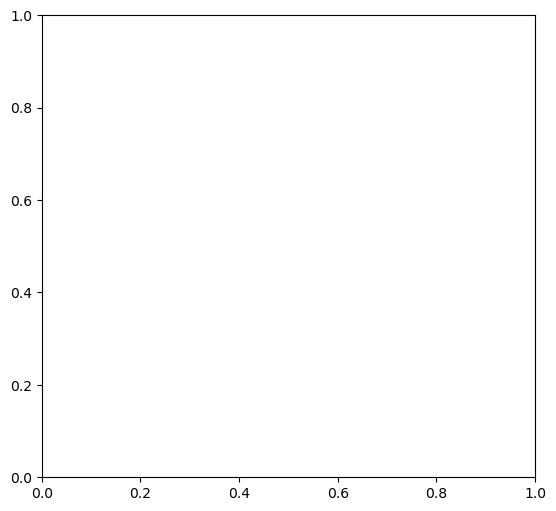

In [108]:
#Plot the original time series data and its BOX-Cox tranformed version
plt.figure(figsize = (14,6))
plt.subplot(1,2,1)
sns.lineplot(df = df_train,x = 'Order Date',y = 'Sales', marker = 'o',color = 'blue')
plt.xtricks(rotation = 90)
plt.title('original Data')

plt.subplot(1,2,2)
sns.lineplot(x = df_boxcox.index, y = df_boxcox,  values =  ,marker = 'o',color = 'blue')
plt.xtricks(rotation = 90)
plt.title('Box-Cox Transformed df[lambda = 0]')
plt.subtile('Sales Data')